In [1]:
from tg.grammar_ru.ml.components.yandex_storage.s3_yandex_helpers import S3YandexHandler
from tg.grammar_ru.common import Loc
from dotenv import load_dotenv
import boto3

project_name = 'antecedents_project'
dataset_name = 'antecedents_simple_dataset'
bucket = 'antecedents-simple'
load_dotenv(Loc.root_path / 'environment.env')

True

Загрузка бандла:

In [11]:
#S3YandexHandler.create_bucket(bucket)

In [12]:
bundle_folder = Loc.bundles_path/'antcd/simple/last'
s3path = f'datasphere/{project_name}/datasets/{dataset_name}'

In [13]:
#S3YandexHandler.upload_folder(bucket, s3path, bundle_folder)

In [14]:
#from tg.grammar_ru.common import DataBundle
#db = DataBundle.load(bundle_folder)
#db

In [5]:
s3_path = r'datasphere/antecedents_project'

kwargs = S3YandexHandler._get_access_keys()
s3_resource = boto3.resource('s3', **kwargs)
bucket_obj = s3_resource.Bucket(bucket)

keys = [z.key for z in bucket_obj.objects.filter(Prefix=s3_path)]
for key in keys:
    print(key)

datasphere/antecedents_project/datasets/antecedents_simple_dataset/add_info.pkl
datasphere/antecedents_project/datasets/antecedents_simple_dataset/index.parquet
datasphere/antecedents_project/datasets/antecedents_simple_dataset/pymorphy.parquet
datasphere/antecedents_project/datasets/antecedents_simple_dataset/slovnet.parquet
datasphere/antecedents_project/datasets/antecedents_simple_dataset/src.parquet
datasphere/antecedents_project/exceptions/antc_task 07:44:15.020543.txt
datasphere/antecedents_project/exceptions/antc_task 09:13:38.508279.txt
datasphere/antecedents_project/exceptions/antc_task 12:48:42.138251.txt
datasphere/antecedents_project/exceptions/antc_task 13:19:53.252689.txt
datasphere/antecedents_project/job_info/job_antecedents_project_07:44:15.020470.txt
datasphere/antecedents_project/job_info/job_antecedents_project_09:13:38.508218.txt
datasphere/antecedents_project/job_info/job_antecedents_project_12:48:42.138251.txt
datasphere/antecedents_project/job_info/job_anteceden

In [4]:
from tg.grammar_ru.ml.components.yandex_delivery.training_logs import S3TrainingLogsLoader, TrainingLogsViewer

tasks = ['antc_task 05:50:39.308735']
loader = S3TrainingLogsLoader(bucket, project_name)
metrics = loader.load_metrics(tasks)

OSError: [Errno 22] Invalid argument: 'c:\\users\\alexandra\\desktop\\grammar_ru\\temp\\training_results\\antc_task 05:50:39.308735.tar.gz.7b7b3967'

In [31]:
from pathlib import Path
from yo_fluq_ds import *
import subprocess
from tg.common.delivery.training.architecture import ResultPickleReader

task_id = 'antc_task 05:50:39.308735'
rs = None
try:
    rs = ResultPickleReader(Path(r'c:\users\alexandra\desktop\output-unzipped'))
except:
    raise
metrics = _load_metrics_df(rs)
metrics['job_id'] = task_id

In [36]:
metrics.head(8)

,metric,ordinal,value,timestamp,job_id
0,roc_auc_score_test,0,0.501481,2022-12-15 05:52:44.735476,antc_task 05:50:39.308735
1,roc_auc_score_display,0,0.503828,2022-12-15 05:52:44.735476,antc_task 05:50:39.308735
2,loss,0,0.127502,2022-12-15 05:52:44.735476,antc_task 05:50:39.308735
3,iteration,0,0.000000,2022-12-15 05:52:44.735476,antc_task 05:50:39.308735
4,roc_auc_score_test,1,0.516618,2022-12-15 05:54:45.970556,antc_task 05:50:39.308735
5,roc_auc_score_display,1,0.518373,2022-12-15 05:54:45.970556,antc_task 05:50:39.308735
6,loss,1,0.126335,2022-12-15 05:54:45.970556,antc_task 05:50:39.308735
7,iteration,1,1.000000,2022-12-15 05:54:45.970556,antc_task 05:50:39.308735


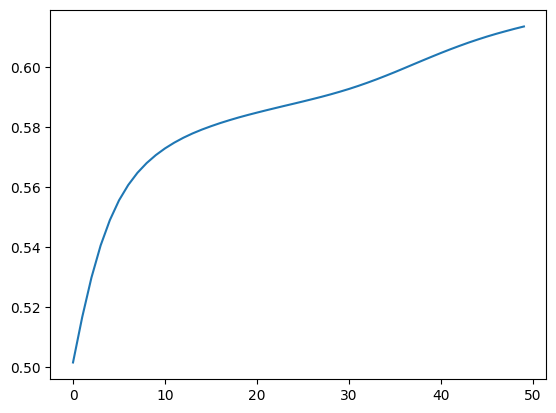

In [37]:
import matplotlib.pyplot as plt
plt.plot(TrainingLogsViewer.get_metric_by_job(metrics, 'roc_auc_score_test'))

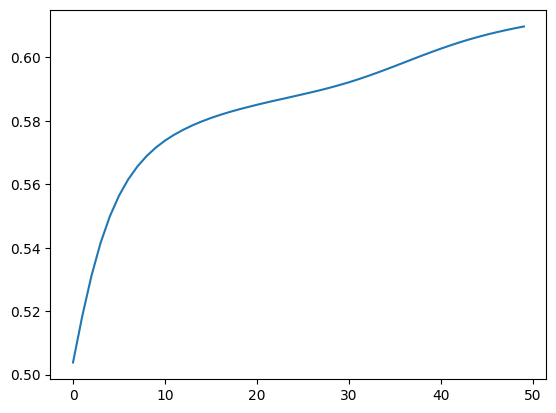

In [38]:
plt.plot(TrainingLogsViewer.get_metric_by_job(metrics, 'roc_auc_score_display'))

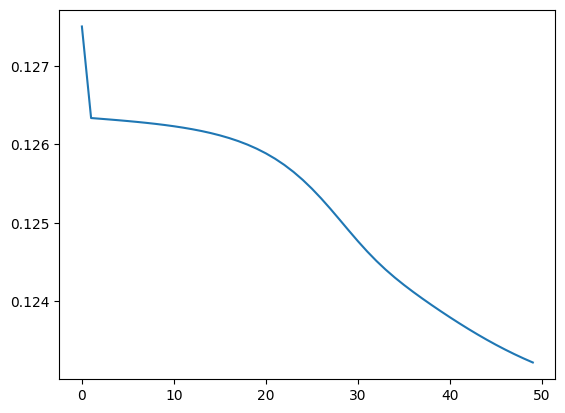

In [39]:
plt.plot(TrainingLogsViewer.get_metric_by_job(metrics, 'loss'))